In [18]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
#Load collected data from istio into a dataframe. In this file there are logs about gRPC calls between 11 microservices from the app online-boutique
data=pd.read_csv('online-boutique3-logs-nov-13-18h31.log',delimiter='\t')

In [26]:
data.head(10) 

,START_TIME,PROTOCOL,RESPONSE_CODE,BYTES_RECEIVED,QUERY,BYTES_SENT,DURATION,UPSTREAM_HOST,DOWNSTREAM_REMOTE_ADDRESS
0,[2024-11-13T17:30:08.803Z],HTTP/2,0,18,/hipstershop.AdService/GetAds,0,1,adservice-MS:9555,frontend-MS:47354
1,[2024-11-13T17:30:08.803Z],HTTP/2,0,15,/hipstershop.AdService/GetAds,0,0,adservice-MS:9555,frontend-MS:47354
2,[2024-11-13T17:30:08.804Z],HTTP/2,0,5,/hipstershop.AdService/GetAds,0,0,adservice-MS:9555,frontend-MS:47354
3,[2024-11-13T17:30:08.804Z],HTTP/2,0,14,/hipstershop.AdService/GetAds,0,0,adservice-MS:9555,frontend-MS:47354
4,[2024-11-13T17:30:09.397Z],HTTP/2,200,5,/hipstershop.AdService/GetAds,148,5,adservice-MS:9555,frontend-MS:47354
5,[2024-11-13T17:30:09.398Z],HTTP/2,200,5,/hipstershop.AdService/GetAds,135,4,adservice-MS:9555,frontend-MS:47354
6,[2024-11-13T17:30:09.398Z],HTTP/2,200,5,/hipstershop.AdService/GetAds,140,5,adservice-MS:9555,frontend-MS:47354
7,[2024-11-13T17:30:09.398Z],HTTP/2,200,5,/hipstershop.AdService/GetAds,119,5,adservice-MS:9555,frontend-MS:47354
8,[2024-11-13T17:30:09.397Z],HTTP/2,200,5,/hipstershop.AdService/GetAds,110,95,adservice-MS:9555,frontend-MS:47354
9,[2024-11-13T17:30:09.503Z],HTTP/2,200,14,/hipstershop.AdService/GetAds,135,2,adservice-MS:9555,frontend-MS:47354


In [20]:
#select features for graphs
data = data[['START_TIME','PROTOCOL','RESPONSE_CODE', 'BYTES_RECEIVED' ,'PROTOCOL','QUERY','BYTES_SENT', 'DURATION' ,'UPSTREAM_HOST','DOWNSTREAM_REMOTE_ADDRESS']]
pd.options.display.max_rows = None
data.describe()

,RESPONSE_CODE,BYTES_RECEIVED,BYTES_SENT,DURATION
count,117163.000000,117163.000000,117163.000000,117163.000000
mean,196.436896,41.735958,239.072455,950.937625
std,54.953934,50.869653,1025.556392,3525.439364
min,0.000000,0.000000,0.000000,0.000000
25%,200.000000,17.000000,20.000000,3.000000
50%,200.000000,19.000000,65.000000,7.000000
75%,200.000000,49.000000,135.000000,20.000000
max,500.000000,471.000000,19320.000000,34797.000000


In [21]:
#All possible response code services (0, 302, and 500 are errors)
QUERY = data['QUERY']
for value in QUERY.unique():
    print(value)

/hipstershop.AdService/GetAds
/hipstershop.CartService/GetCart
/hipstershop.CartService/AddItem
/hipstershop.CartService/EmptyCart
/hipstershop.ProductCatalogService/GetProduct
/hipstershop.CheckoutService/PlaceOrder
/hipstershop.CurrencyService/Convert
/hipstershop.ShippingService/GetQuote
/hipstershop.PaymentService/Charge
/hipstershop.ShippingService/ShipOrder
/hipstershop.EmailService/SendOrderConfirmation
/hipstershop.CurrencyService/GetSupportedCurrencies
/product/66VCHSJNUP
/hipstershop.RecommendationService/ListRecommendations
/product/2ZYFJ3GM2N
/product/LS4PSXUNUM
/cart
/product/L9ECAV7KIM
/product/1YMWWN1N4O
/product/0PUK6V6EV0
/product/9SIQT8TOJO
/product/OLJCESPC7Z
/product/6E92ZMYYFZ
/setCurrency
/hipstershop.ProductCatalogService/ListProducts
/cart/checkout
/


In [22]:
#All possible response code services (0, 302, and 500 are errors)
PROTOCOL = data['PROTOCOL']
for value in PROTOCOL.unique():
    print(value)

HTTP/2
HTTP/1.1


In [14]:
#All possible response code services (0, 302, and 500 are errors)
RESPONSE_CODE = data['RESPONSE_CODE']
for value in RESPONSE_CODE.unique():
    print(value)

0
200
302
500


In [11]:
#All possible upsteram services
UPSTREAM_HOST = data['UPSTREAM_HOST']
for value in UPSTREAM_HOST.unique():
    print(value)

adservice-MS:9555
cartservice-MS:7070
productcatalogservice-MS:3550
checkoutservice-MS:5050
currencyservice-MS:7000
shippingservice-MS:50051
paymentservice-MS:50051
emailservice-MS:8080
frontend-MS:8080
recommendationservice-MS:8080


In [23]:
#All possible downstream services- we need to clean that and delete ports to have only MS names
DOWNSTREAM_REMOTE_ADDRESS = data['DOWNSTREAM_REMOTE_ADDRESS']
for value in DOWNSTREAM_REMOTE_ADDRESS.unique():
    print(value)


frontend-MS:47354
frontend-MS:46682
frontend-MS:45408
checkoutservice-MS:42346
checkoutservice-MS:41352
checkoutservice-MS:52592
frontend-MS:57198
checkoutservice-MS:54224
checkoutservice-MS:39824
checkoutservice-MS:33096
checkoutservice-MS:41320
frontend-MS:33848
checkoutservice-MS:33840
checkoutservice-MS:52578
frontend-MS:43316
checkoutservice-MS:37106
frontend-MS:33830
loadgenerator-MS:59848
frontend-MS:52696
frontend-MS:54418
loadgenerator-MS:59740
loadgenerator-MS:51818
loadgenerator-MS:57732
loadgenerator-MS:57810
frontend-MS:36858
loadgenerator-MS:35172
loadgenerator-MS:33530
loadgenerator-MS:34862
loadgenerator-MS:34684
loadgenerator-MS:57430
loadgenerator-MS:57352
loadgenerator-MS:57270
loadgenerator-MS:59242
loadgenerator-MS:59928
loadgenerator-MS:56224
loadgenerator-MS:59232
loadgenerator-MS:58728
loadgenerator-MS:35274
loadgenerator-MS:34050
loadgenerator-MS:57550
loadgenerator-MS:58814
loadgenerator-MS:59226
loadgenerator-MS:35292
loadgenerator-MS:57806
loadgenerator-MS:5

In [32]:
#Skip this, it was done to take part of the data where there is no calls
'''
#We take out part of the date where there not sercice calls 
data2=data.tail(-60000)
#data3 = data2[['START_TIME','PROTOCOL','RESPONSE_CODE', 'BYTES_RECEIVED' ,'BYTES_SENT', 'DURATION' ,'UPSTREAM_HOST','DOWNSTREAM_REMOTE_ADDRESS']]
data2.head()
data2.to_csv('out.csv', index=False)  '''

"\n#We take out part of the date where there not sercice calls \ndata2=data.tail(-60000)\n#data3 = data2[['START_TIME','PROTOCOL','RESPONSE_CODE', 'BYTES_RECEIVED' ,'BYTES_SENT', 'DURATION' ,'UPSTREAM_HOST','DOWNSTREAM_REMOTE_ADDRESS']]\ndata2.head()\ndata2.to_csv('out.csv', index=False)  "

In [27]:
#Skip this, it was done to clean the data

'''data2=pd.read_csv('out.csv',delimiter=',')#, delimiteurs=';')
data2 = data2[['START_TIME','PROTOCOL','RESPONSE_CODE', 'BYTES_RECEIVED' ,'BYTES_SENT', 'DURATION' ,'UPSTREAM_HOST','DOWNSTREAM_REMOTE_ADDRESS']]
for i in range (len(data2)):
    #print(data2['START_TIME'][i][1:len(data2['START_TIME'][i])-1])
    date_=data2['START_TIME'][i][1:11]
    date_object = datetime.strptime(date_, '%Y-%m-%d').date()
    #print(date_object,type(date_object))
    time_=data2['START_TIME'][i][12:20]
    time_object = datetime.strptime(time_, '%H:%M:%S').time()
    #print(time_object, type(time_object))
    dt=datetime.combine(date_object, time_object)
    #data2['START_TIME'][i]=data2['START_TIME'][i][1:len(data2['START_TIME'][i])-1]   
    #datetime_object = datetime.strptime(data2['START_TIME'][i], '%m/%d/%y %H:%M:%S')
    data2['START_TIME'][i]=dt
    #print(data2['START_TIME'][i])
    #data2['DOWNSTREAM_LOCAL_ADDRESS'][i]=data2['DOWNSTREAM_LOCAL_ADDRESS'][i][:len(data2['DOWNSTREAM_LOCAL_ADDRESS'][i])-3]
    #data2['DOWNSTREAM_REMOTE_ADDRESS'][i]=data2['DOWNSTREAM_REMOTE_ADDRESS'][i][:len(data2['DOWNSTREAM_REMOTE_ADDRESS'][i])-6]
data2.head()'''

"data2=pd.read_csv('out.csv',delimiter=',')#, delimiteurs=';')\ndata2 = data2[['START_TIME','PROTOCOL','RESPONSE_CODE', 'BYTES_RECEIVED' ,'BYTES_SENT', 'DURATION' ,'UPSTREAM_HOST','DOWNSTREAM_REMOTE_ADDRESS']]\nfor i in range (len(data2)):\n    #print(data2['START_TIME'][i][1:len(data2['START_TIME'][i])-1])\n    date_=data2['START_TIME'][i][1:11]\n    date_object = datetime.strptime(date_, '%Y-%m-%d').date()\n    #print(date_object,type(date_object))\n    time_=data2['START_TIME'][i][12:20]\n    time_object = datetime.strptime(time_, '%H:%M:%S').time()\n    #print(time_object, type(time_object))\n    dt=datetime.combine(date_object, time_object)\n    #data2['START_TIME'][i]=data2['START_TIME'][i][1:len(data2['START_TIME'][i])-1]   \n    #datetime_object = datetime.strptime(data2['START_TIME'][i], '%m/%d/%y %H:%M:%S')\n    data2['START_TIME'][i]=dt\n    #print(data2['START_TIME'][i])\n    #data2['DOWNSTREAM_LOCAL_ADDRESS'][i]=data2['DOWNSTREAM_LOCAL_ADDRESS'][i][:len(data2['DOWNSTREAM_L

In [5]:
#Skip this, it was done to clean the data
'''for i in range (len(data2)):
    pos=data2['UPSTREAM_HOST'][i].rfind(':')
    data2['UPSTREAM_HOST'][i]=data2['UPSTREAM_HOST'][i][0:pos]
    pos2=str(data2['DOWNSTREAM_REMOTE_ADDRESS'][i]).rfind(':')
    data2['DOWNSTREAM_REMOTE_ADDRESS'][i]=str(data2['DOWNSTREAM_REMOTE_ADDRESS'][i])[0:pos2]    
data2.head()'''

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

/tmp/ipykernel_17838/1842924289.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['UPSTREAM_HOST'][i]=data2['UPSTREAM_HOST'][i][0:pos]
/tmp/ipykernel_17838/1842924289.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Ser

,START_TIME,PROTOCOL,RESPONSE_CODE,BYTES_RECEIVED,BYTES_SENT,DURATION,UPSTREAM_HOST,DOWNSTREAM_REMOTE_ADDRESS
0,2024-11-13 17:33:08,HTTP/2,200,226,5,5,emailservice-MS,checkoutservice-MS
1,2024-11-13 17:33:08,HTTP/2,200,237,5,6,emailservice-MS,checkoutservice-MS
2,2024-11-13 17:33:08,HTTP/2,200,246,5,1,emailservice-MS,checkoutservice-MS
3,2024-11-13 17:33:08,HTTP/2,200,259,5,1,emailservice-MS,checkoutservice-MS
4,2024-11-13 17:33:08,HTTP/2,200,259,5,3,emailservice-MS,checkoutservice-MS


In [29]:
#Skip this, it was done to clean the data 
'''
data2=data2.sort_values(by='START_TIME')  
data2.head(10)
data2.to_csv('out2.csv', index=False) '''




"\ndata2=data2.sort_values(by='START_TIME')  \ndata2.head(10)\ndata2.to_csv('out2.csv', index=False) "

In [31]:
# let's open the data ordered in timeseries and ready for graphs now
data=pd.read_csv('cleaned.csv',delimiter=',')#, delimiteurs=';')
data.head(10)

,START_TIME,PROTOCOL,RESPONSE_CODE,BYTES_RECEIVED,BYTES_SENT,DURATION,UPSTREAM_HOST,DOWNSTREAM_REMOTE_ADDRESS
0,2024-11-13 17:06:56,HTTP/2,200,48,43,174,paymentservice-MS,checkoutservice-MS
1,2024-11-13 17:06:58,HTTP/2,200,49,43,7,paymentservice-MS,checkoutservice-MS
2,2024-11-13 17:07:02,HTTP/2,200,48,43,5,paymentservice-MS,checkoutservice-MS
3,2024-11-13 17:07:03,HTTP/2,200,49,43,5,paymentservice-MS,checkoutservice-MS
4,2024-11-13 17:07:03,HTTP/2,200,49,43,11,paymentservice-MS,checkoutservice-MS
5,2024-11-13 17:07:09,HTTP/2,200,49,43,3,paymentservice-MS,checkoutservice-MS
6,2024-11-13 17:07:09,HTTP/2,200,49,43,6,paymentservice-MS,checkoutservice-MS
7,2024-11-13 17:07:12,HTTP/2,200,49,43,5,paymentservice-MS,checkoutservice-MS
8,2024-11-13 17:07:15,HTTP/2,200,48,43,5,paymentservice-MS,checkoutservice-MS
9,2024-11-13 17:07:16,HTTP/2,200,48,43,5,paymentservice-MS,checkoutservice-MS


In [40]:
#Here we divide the data into 11 files of size 5000 lines ordered in time so we can construct a Temporal graph for each file and see the dynamic call evolution
data = data[['START_TIME','PROTOCOL','RESPONSE_CODE', 'BYTES_RECEIVED' ,'BYTES_SENT', 'DURATION' ,'UPSTREAM_HOST','DOWNSTREAM_REMOTE_ADDRESS']]
pd.options.display.max_rows = None
for i in range (int(len(data)/5000)):
    datay=data.head(5000)
    data=data.tail(-5000)
    name='file'+str(i)+'.csv'
    print(name)
    datay.to_csv(name, index=False) 
    

In [38]:
import matplotlib.pyplot as plt
import networkx as nx

Graph(number_of_nodes=4, number_of_edges=3, number_of_temporal_edges=5000, earliest_time=61616000000, latest_time=63061000000)


Graph(number_of_nodes=5, number_of_edges=4, number_of_temporal_edges=5000, earliest_time=63061000000, latest_time=63266000000)


Graph(number_of_nodes=5, number_of_edges=4, number_of_temporal_edges=5000, earliest_time=63266000000, latest_time=63503000000)


Graph(number_of_nodes=6, number_of_edges=5, number_of_temporal_edges=5000, earliest_time=63503000000, latest_time=63929000000)


Graph(number_of_nodes=7, number_of_edges=7, number_of_temporal_edges=5000, earliest_time=63929000000, latest_time=64176000000)


Graph(number_of_nodes=3, number_of_edges=2, number_of_temporal_edges=5000, earliest_time=64176000000, latest_time=64220000000)


Graph(number_of_nodes=3, number_of_edges=2, number_of_temporal_edges=5000, earliest_time=64220000000, latest_time=64264000000)


Graph(number_of_nodes=7, number_of_edges=7, number_of_temporal_edges=5000, earliest_time=64264000000, latest_time=64293000000)


Graph(number_of_nodes=9, number_of_edges=8, number_of_temporal_edges=5000, earliest_time=64293000000, latest_time=64303000000)


Graph(number_of_nodes=9, number_of_edges=9, number_of_temporal_edges=5000, earliest_time=64303000000, latest_time=64307000000)


Graph(number_of_nodes=11, number_of_edges=12, number_of_temporal_edges=5000, earliest_time=64307000000, latest_time=64312000000)


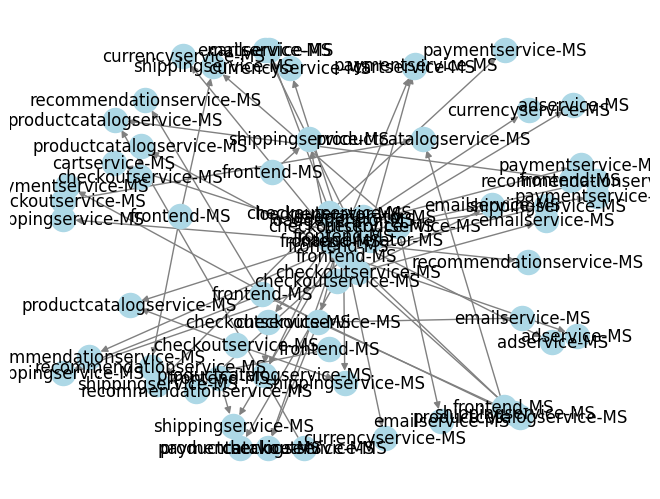

In [39]:
import raphtory as rp

for j in range (11):
    name='file'+str(j)+'.csv'
    data2=pd.read_csv(name,delimiter=',')#, delimiteurs=';')
    data2 = data2[['START_TIME','PROTOCOL','RESPONSE_CODE', 'BYTES_RECEIVED' ,'BYTES_SENT', 'DURATION' ,'UPSTREAM_HOST','DOWNSTREAM_REMOTE_ADDRESS']]
    data2['START_TIME'] = pd.to_datetime(data2['START_TIME']).dt.time
    #data2=data2.sort_values(by='START_TIME')  
    g = rp.Graph()
    g.load_edges_from_pandas(
    df=data2,
    time="START_TIME",
    src="DOWNSTREAM_REMOTE_ADDRESS",
    dst="UPSTREAM_HOST",
    properties=["RESPONSE_CODE","BYTES_RECEIVED" ,"BYTES_SENT", "DURATION"],
    )
    print(g)
    nx_g = g.to_networkx()
    nx.draw(nx_g, with_labels=True, node_color="lightblue", edge_color="gray")


Graph(number_of_nodes=11, number_of_edges=12, number_of_temporal_edges=57163, earliest_time=1731517616000, latest_time=1731520315000)


,START_TIME,PROTOCOL,RESPONSE_CODE,BYTES_RECEIVED,BYTES_SENT,DURATION,UPSTREAM_HOST,DOWNSTREAM_REMOTE_ADDRESS
0,2024-11-13 17:06:56,HTTP/2,200,48,43,174,paymentservice-MS,checkoutservice-MS
1,2024-11-13 17:06:58,HTTP/2,200,49,43,7,paymentservice-MS,checkoutservice-MS
2,2024-11-13 17:07:02,HTTP/2,200,48,43,5,paymentservice-MS,checkoutservice-MS
3,2024-11-13 17:07:03,HTTP/2,200,49,43,5,paymentservice-MS,checkoutservice-MS
4,2024-11-13 17:07:03,HTTP/2,200,49,43,11,paymentservice-MS,checkoutservice-MS


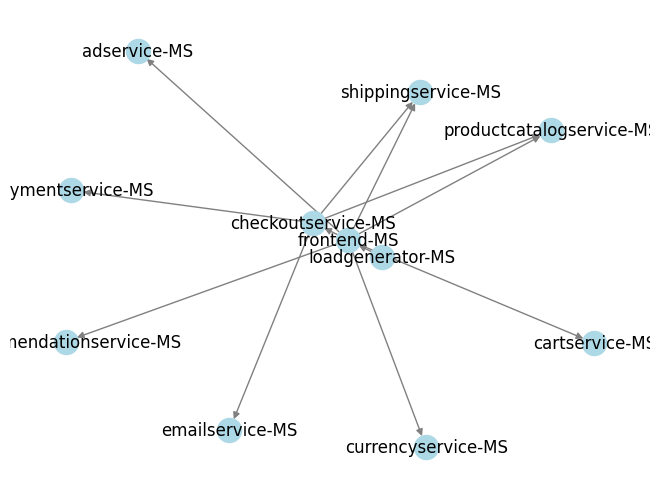

In [49]:
#Here we try to use windows in raphtory to construct these graphs by a window (a window is defined by a start date and an end date)
import raphtory as rp

data2=pd.read_csv('cleaned.csv',delimiter=',')#, delimiteurs=';')
data2 = data2[['START_TIME','PROTOCOL','RESPONSE_CODE', 'BYTES_RECEIVED' ,'BYTES_SENT', 'DURATION' ,'UPSTREAM_HOST','DOWNSTREAM_REMOTE_ADDRESS']]
data2['START_TIME'] = pd.to_datetime(data2['START_TIME'])

g2 = rp.Graph()
g2.load_edges_from_pandas(
df=data2,
time="START_TIME",
src="DOWNSTREAM_REMOTE_ADDRESS",
dst="UPSTREAM_HOST",
properties=["RESPONSE_CODE","BYTES_RECEIVED" ,"BYTES_SENT", "DURATION"],
)
start_day = datetime.strptime("2024-11-13 17:00:00", "%Y-%m-%d %H:%M:%S")
end_day = datetime.strptime("2024-11-13 17:55:00", "%Y-%m-%d %H:%M:%S")


e = g2.window(start_day,end_day)
print(e)
nx_g = e.to_networkx()
nx.draw(nx_g, with_labels=True, node_color="lightblue", edge_color="gray")
data2.head()
#Begin: 2024-11-13 17:06:56
#End: 2024-11-13 17:51:55

In [45]:
g.load_edges_from_pandas(
    df=data2,
    time="START_TIME",
    src="DOWNSTREAM_REMOTE_ADDRESS",
    dst="UPSTREAM_HOST",
    properties=["RESPONSE_CODE","BYTES_RECEIVED" ,"BYTES_SENT", "DURATION"],
)



In [46]:
print("The resulting graphs and example node/edge:")
print(g)
print("Stats on the graph structure:")
print(g.nodes)
number_of_nodes = g.count_nodes()
number_of_edges = g.count_edges()
total_interactions = g.count_temporal_edges()
unique_layers = g.unique_layers
print (number_of_nodes)
print(g.edges)

The resulting graphs and example node/edge:
Graph(number_of_nodes=11, number_of_edges=12, number_of_temporal_edges=62163, earliest_time=64307000000, latest_time=1731520315000)
Stats on the graph structure:
Nodes(Node(name=frontend-MS, earliest_time=64307000000, latest_time=1731520315000), Node(name=loadgenerator-MS, earliest_time=64307000000, latest_time=1731520314000), Node(name=checkoutservice-MS, earliest_time=64309000000, latest_time=1731520315000), Node(name=currencyservice-MS, earliest_time=64307000000, latest_time=1731520310000), Node(name=productcatalogservice-MS, earliest_time=64307000000, latest_time=1731520315000), Node(name=recommendationservice-MS, earliest_time=64308000000, latest_time=1731520312000), Node(name=cartservice-MS, earliest_time=64307000000, latest_time=1731520314000), Node(name=adservice-MS, earliest_time=64307000000, latest_time=1731520314000), Node(name=shippingservice-MS, earliest_time=64307000000, latest_time=1731520314000), Node(name=paymentservice-MS, e

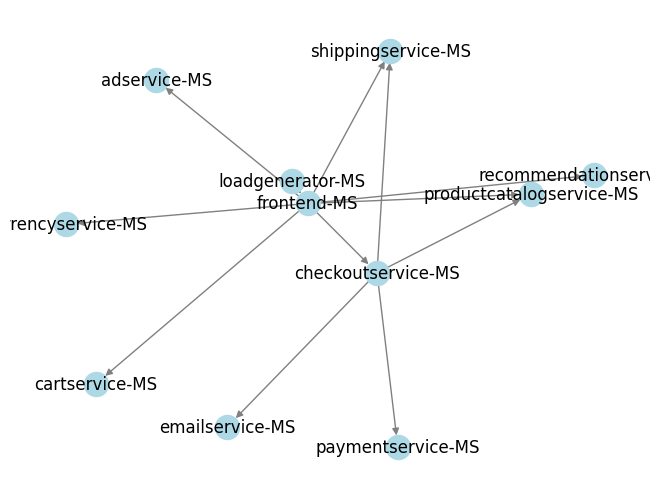

In [57]:
nx_g = g.to_networkx()
nx.draw(nx_g, with_labels=True, node_color="lightblue", edge_color="gray")
